In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Visualizing Data
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv('Diwali Sales Data.csv', encoding ='unicode_escape')

In [9]:
df.shape

(11251, 15)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
df.drop(['Status','unnamed1'], axis=1, inplace=True) 
# Removed Status unnamed1 column

In [15]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
df.shape

(11251, 13)

In [20]:
df.dropna(inplace=True)
# Removed Null Values

In [21]:
df.shape

(11239, 13)

In [22]:
# Initialize List of Lists
data_test = [['madhav', 11], ['Gopi', 15], ['Keshav', ], ['Lalita', 16]]

# Creating Pandas DataFrame using List
df_test = pd.DataFrame(data_test, columns=['Name', 'Age'])

df_test

,Name,Age
0,madhav,11.0
1,Gopi,15.0
2,Keshav,NaN
3,Lalita,16.0


In [25]:
df_test.dropna(inplace = True) # Saving Changes

In [24]:
df_test

,Name,Age
0,madhav,11.0
1,Gopi,15.0
3,Lalita,16.0


In [26]:
# Changing Data Type
df['Amount'] = df['Amount'].astype('int')

In [29]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

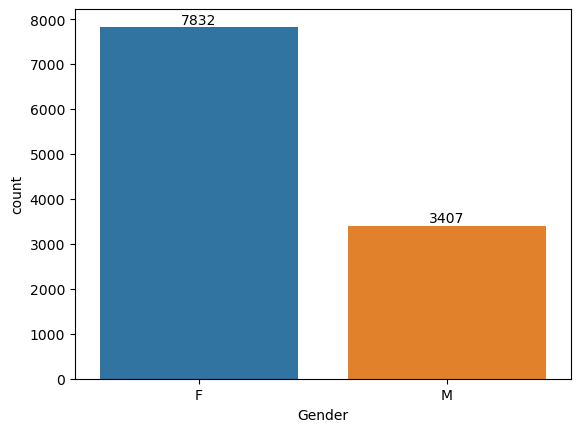

In [33]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

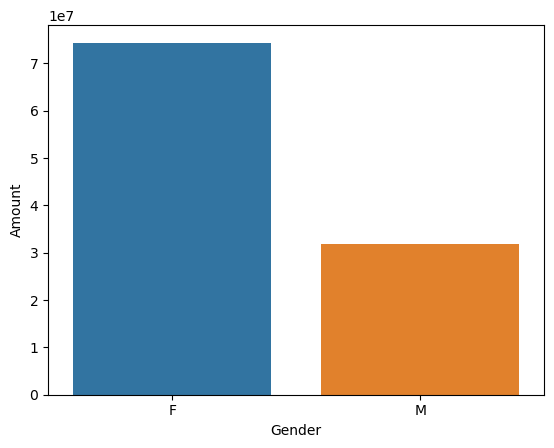

In [36]:
# Grouped the 'Gender' Column, Grouped by Amount and took SUM and sorted the Vales. 
sales_gen =  df.groupby(['Gender'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

##### From the above graphs we can see that most of the buyers are females and even the purchasing power of females is greater than men

### Age

In [37]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

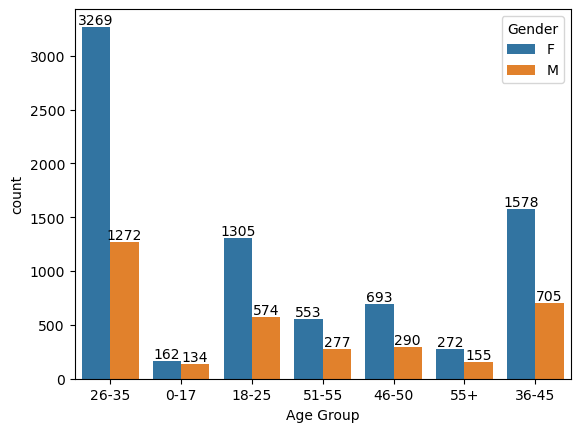

In [40]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

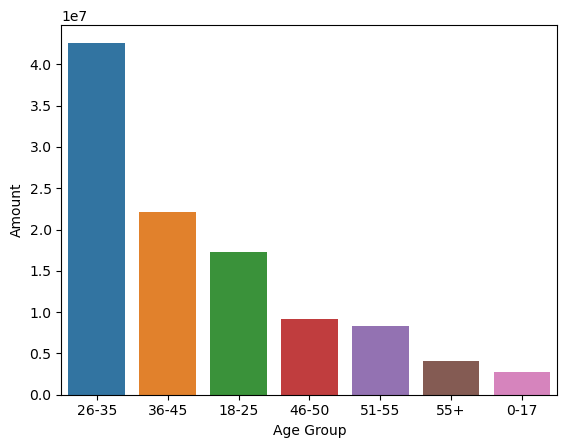

In [41]:
# Grouped the 'Age' Column, Grouped by Amount and took SUM and sorted the Vales. 
sales_age = df.groupby(['Age Group'], as_index = False) ['Amount'].sum().sort_values(by = ['Amount'], ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

##### By seeing the above graphs we can say that most of the buyers are of age group between 26-35 years and are Females.  

### State

In [42]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

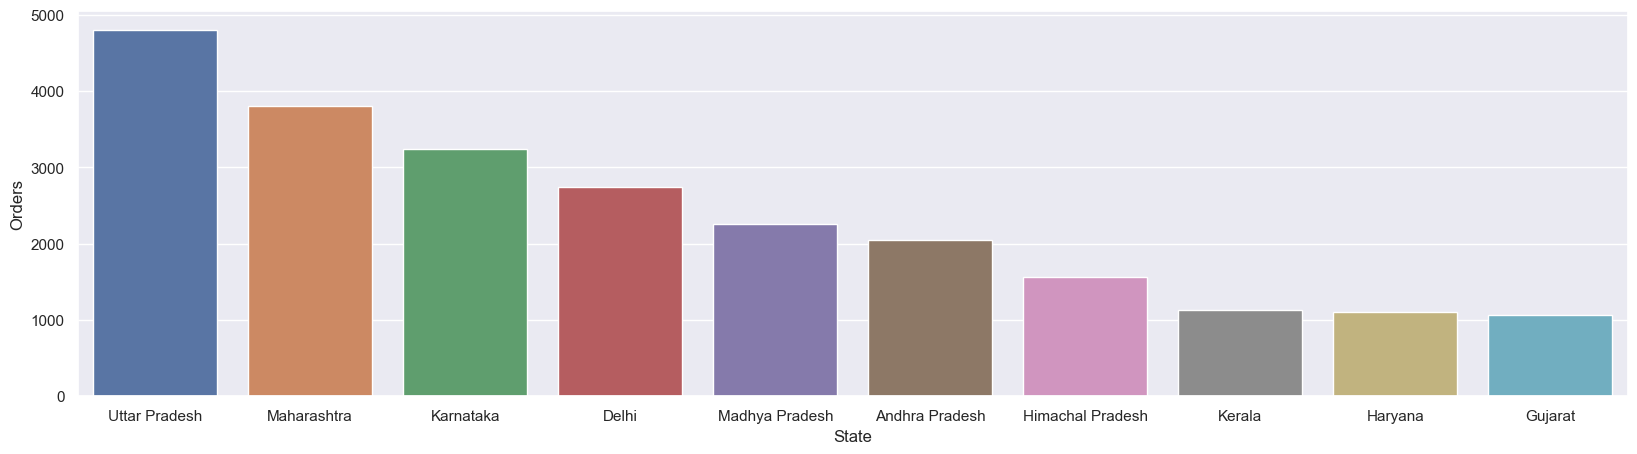

In [55]:
# Total number of Orders from Top 10 states

# Grouped the 'State' Column, Grouped by Orders and took SUM and sorted the Vales. 
sales_state = df.groupby(['State'], as_index = False) ['Orders'].sum().sort_values(by = ['Orders'], ascending = False).head(10)

sns.set(rc = {'figure.figsize':(20,5)}) # setting plot size

sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

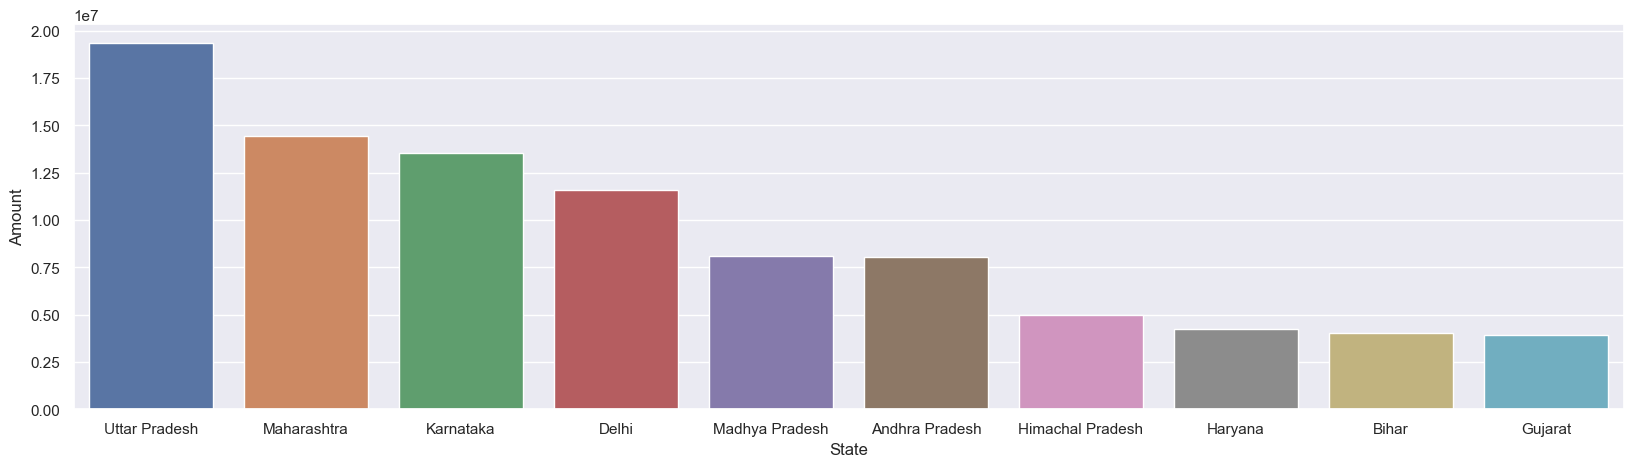

In [56]:
# Total Amount/Sales from Top 10 states

# Grouped the 'State' Column, Grouped by Amount and took SUM and sorted the Vales. 
sales_state = df.groupby(['State'], as_index = False) ['Amount'].sum().sort_values(by = ['Amount'], ascending = False).head(10)

sns.set(rc = {'figure.figsize':(20,5)}) # setting plot size

sns.barplot(x = 'State', y = 'Amount', data = sales_state)

##### From the above graphs we can see that unexpectedly most of the orders are from Uttar Pradesh, Maharashtra and Karnataka respectively.

### Marital Status

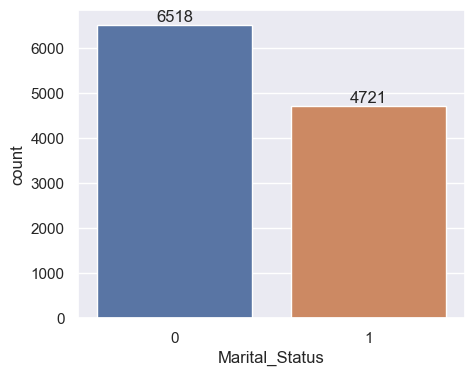

In [63]:
ax = sns.countplot(x = 'Marital_Status', data = df)

sns.set(rc = {'figure.figsize':(6,4)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

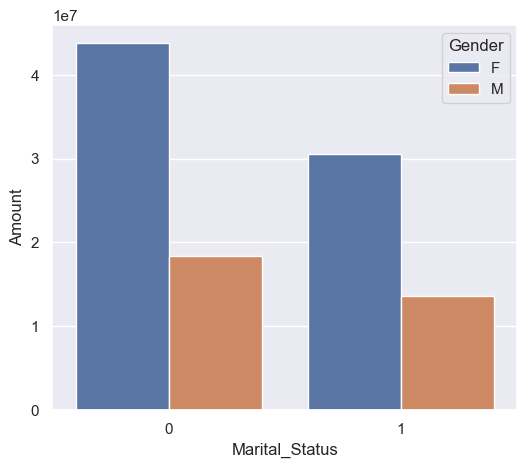

In [69]:
# Grouped the 'Marital Status' Column, Grouped by Amount and took SUM and sorted the Vales. 
sales_mar = df.groupby(['Marital_Status','Gender'], as_index = False) ['Amount'].sum().sort_values(by = ['Amount'], ascending = False)

sns.set(rc = {'figure.figsize':(6,5)})

sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_mar, hue = 'Gender')

##### From the above graphs we can say that most of the buyers are married [women] and they have high purchasing power.

### Occupation

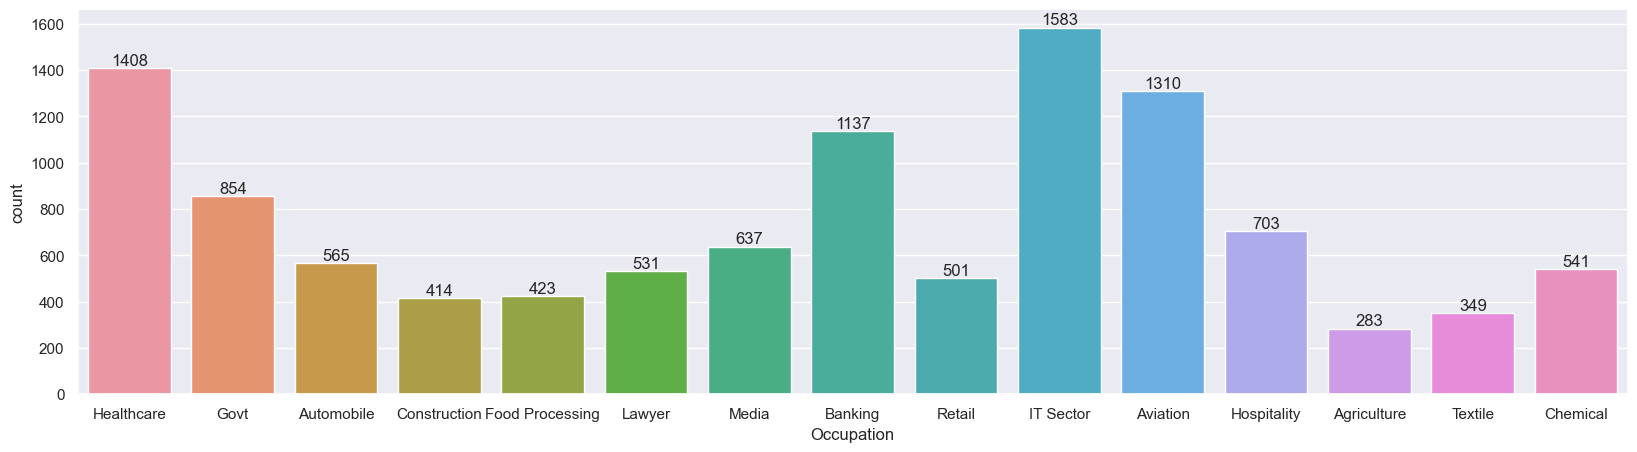

In [73]:
ax = sns.countplot(x = 'Occupation', data = df)

sns.set(rc = {'figure.figsize':(25,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

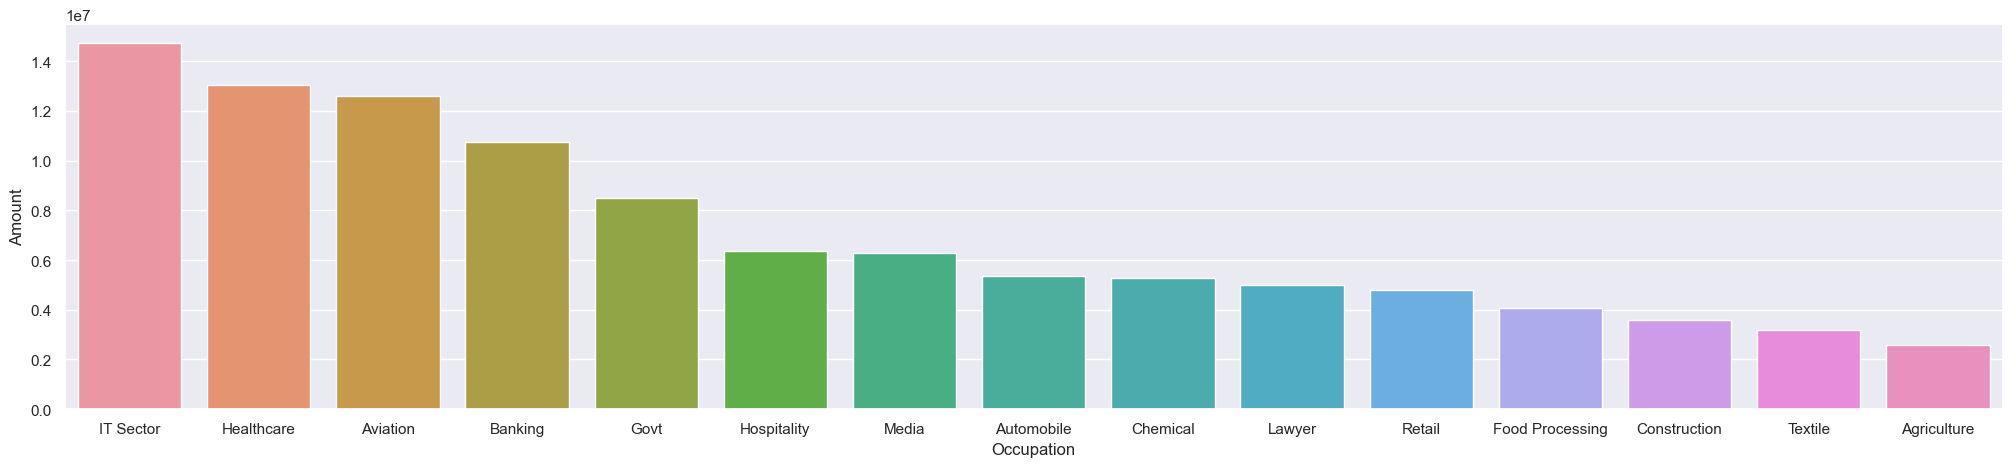

In [78]:
# Grouped the 'Occupation' Column, Grouped by Amount and took SUM and sorted the Vales. 
sales_occ = df.groupby(['Occupation'], as_index = False) ['Amount'].sum().sort_values(by = ['Amount'], ascending = False)

sns.set(rc = {'figure.figsize':(25,5)})

sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occ)

##### From the above graph we can say that most of the buyers are working in IT Sector, Aviation and Helthcare Sector.

### Product Category

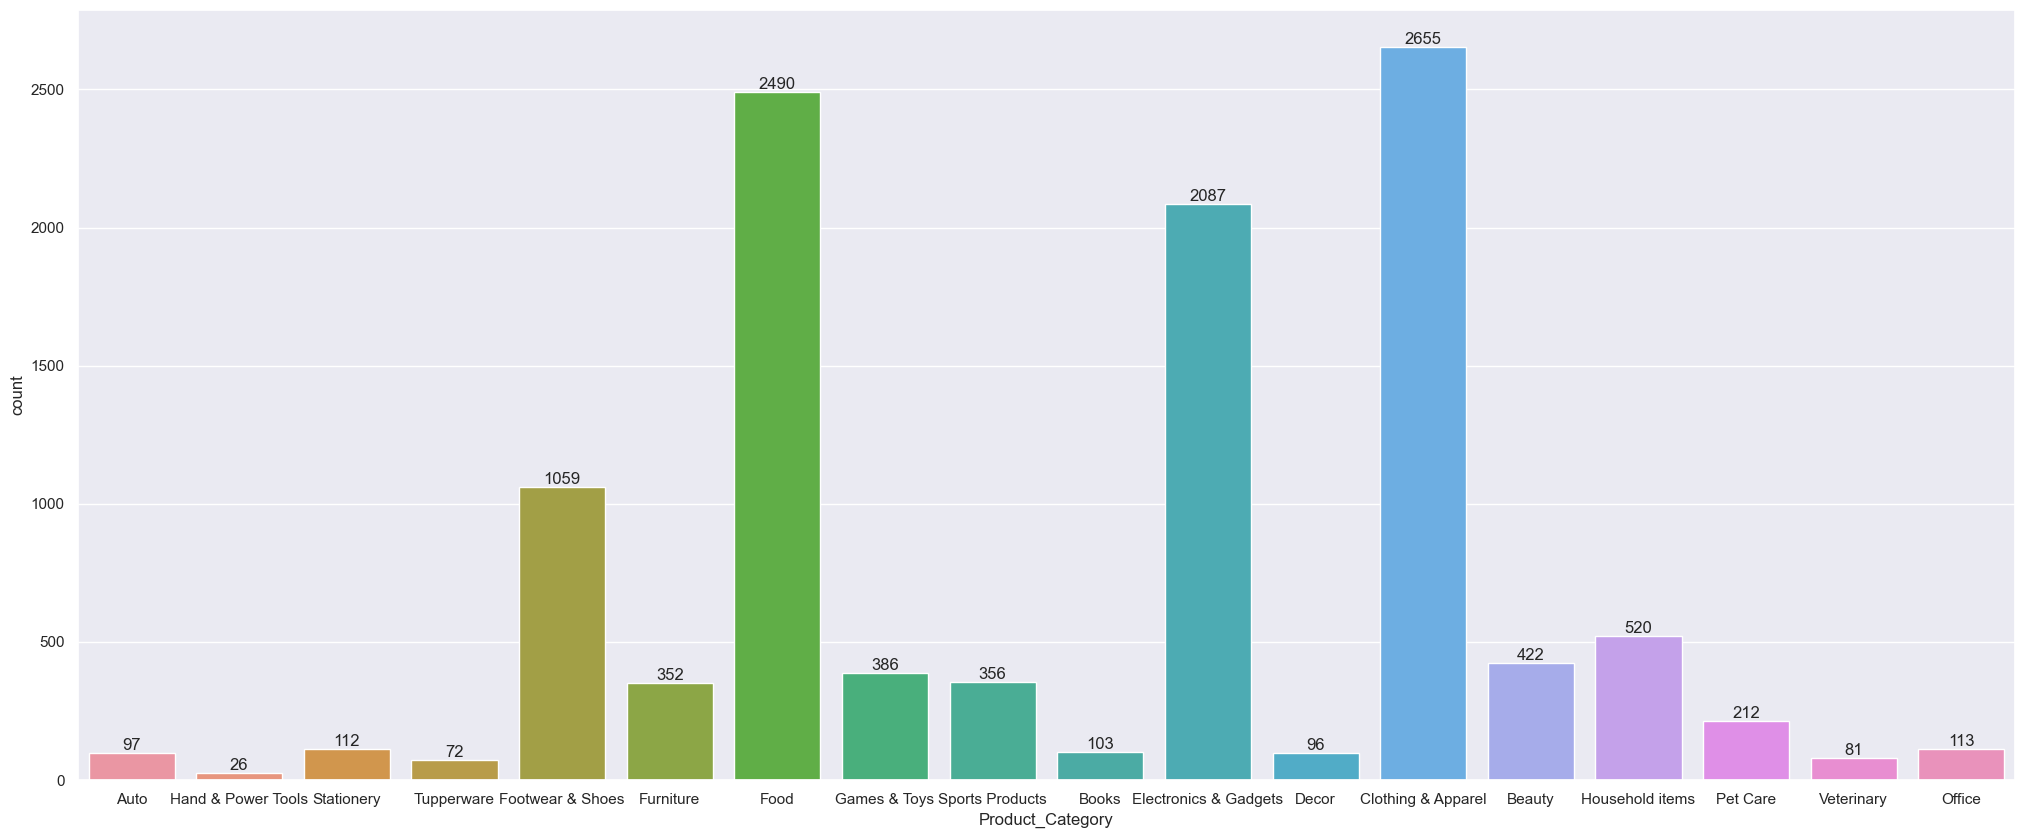

In [82]:
ax = sns.countplot(x = 'Product_Category', data = df)

sns.set(rc = {'figure.figsize':(25,10)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

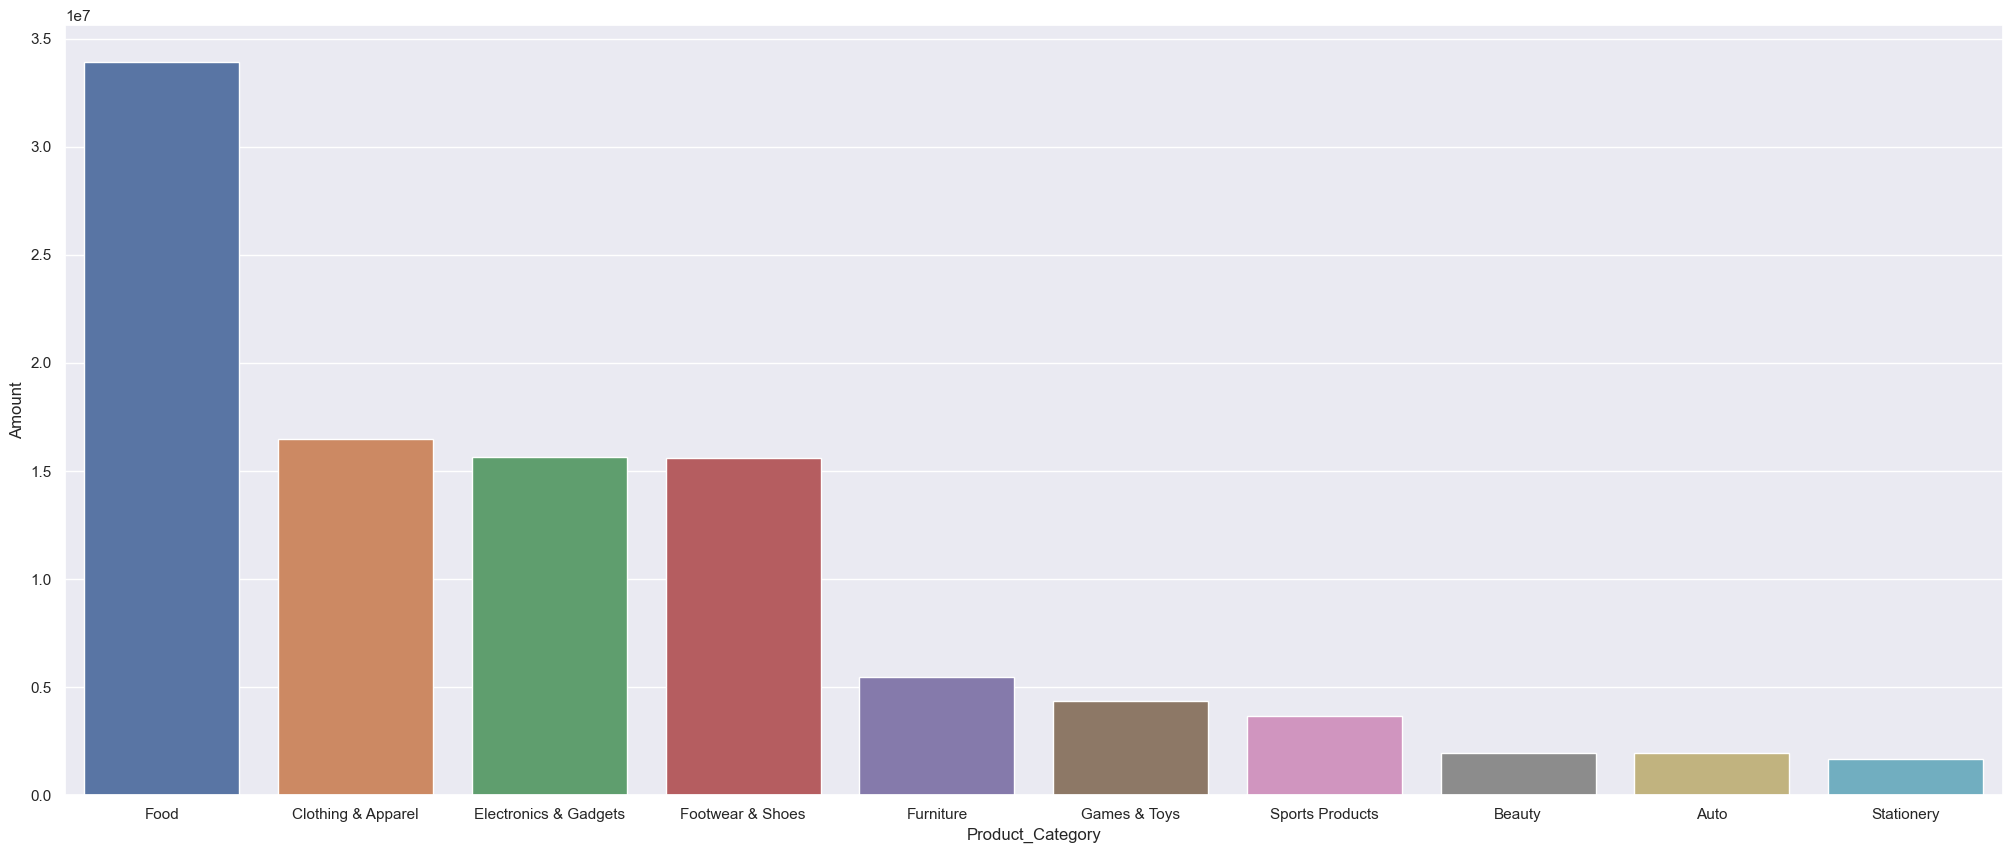

In [87]:
# Grouped the 'Product Category' Column, Grouped by Amount and took SUM and sorted the Vales. 
sales_pc = df.groupby(['Product_Category'], as_index = False) ['Amount'].sum().sort_values(by = ['Amount'], ascending = False).head(10)

sns.set(rc = {'figure.figsize':(25,10)})

sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_pc)

##### From the above graph we see that the most sold product category are: Food, Clothing and Electronics Category.

<Axes: xlabel='Product_ID'>

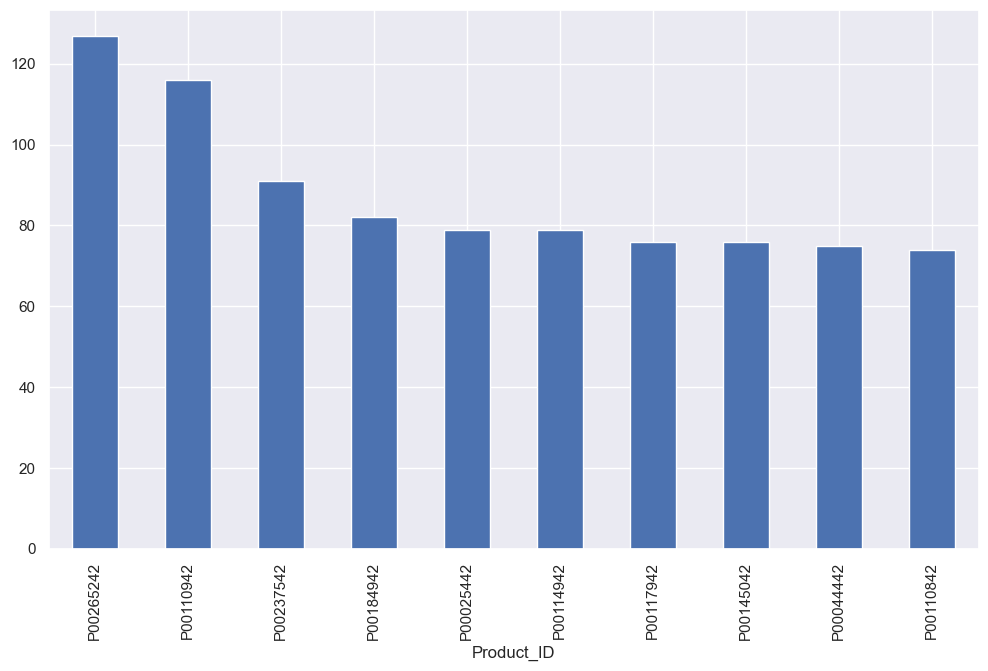

In [89]:
# Top 10 Most sold products

fig1, ax1 = plt.subplots(figsize=(12,7))

df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

# Conclusion on the basis of Analysis:

#### --> Married women age group between 26-35 from Uttar Pradesh.
#### --> Maharashtra & Karnataka working in IT sector.
#### --> people are more likely to buy products from Clothing & Electronics Category.